In [8]:
import numpy as np
import matplotlib.pyplot as plt


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense

In [9]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def decode_review(review):
    offsetChars = 3
    dictionary = imdb.get_word_index()
    decoded_dictionary = dict([(value, key) for (key, value) in dictionary.items()])
    return ''.join([decoded_dictionary.get(i - offsetChars, '?') for i in train_data[0]])

In [111]:
def one_hot_encode(review, dimension = 10000):
    encoded = np.zeros(dimension)
    for i, word in enumerate(review):
        encoded[word] = True
    return encoded
        

def vectorize_reviews(reviews, dimension = 10000):
    vectorized = np.zeros((len(reviews), dimension))
    
    for i, review in enumerate(reviews):
        vectorized[i] = one_hot_encode(review, dimension)   
        
    return vectorized


X_train     = vectorize_reviews(train_data)
X_test      = vectorize_reviews(test_data)

y_train     = np.asarray(train_labels).astype('float32')
y_test      = np.asarray(train_labels).astype('float32')

X_val       = X_train[:10000]
y_val       = y_train[:10000]

X_train_partial = X_train[10000:]
y_train_partial = y_train[10000:]

print((X_train, y_train))
print(X_train.shape)


(array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]]), array([ 1.,  0.,  0., ...,  0.,  1.,  0.], dtype=float32))
(25000, 10000)


In [112]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

In [113]:
history = model.fit(X_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 12s - loss: 0.6928 - acc: 0.5098

 1024/15000 [=>............................] - ETA: 7s - loss: 0.6832 - acc: 0.5781 

 2048/15000 [===>..........................] - ETA: 3s - loss: 0.6543 - acc: 0.6455

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.6344 - acc: 0.6618

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.6163 - acc: 0.6814

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.5967 - acc: 0.7104

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.5777 - acc: 0.7344

 7168/15000 [=============>................] - ETA: 1s - loss: 0.5694 - acc: 0.7391

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5546 - acc: 0.7531

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5423 - acc: 0.7643

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5302 - acc: 0.7751

10752/15000 [====================>.........] - ETA: 0s - loss: 0.5253 - acc: 0.7787

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5208 - acc: 0.7818

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5115 - acc: 0.7879

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5029 - acc: 0.7939

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4945 - acc: 0.7984

15000/15000 [==============================] - 2s 158us/step - loss: 0.4896 - acc: 0.8011 - val_loss: 0.3667 - val_acc: 0.8781


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3297 - acc: 0.9023

 1024/15000 [=>............................] - ETA: 1s - loss: 0.3224 - acc: 0.9043

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3201 - acc: 0.9095

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.3168 - acc: 0.9102

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.3233 - acc: 0.8981

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.3213 - acc: 0.8992

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3148 - acc: 0.9012

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3105 - acc: 0.9023

 7168/15000 [=============>................] - ETA: 0s - loss: 0.3071 - acc: 0.9033

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3058 - acc: 0.9027

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3047 - acc: 0.9025

10240/15000 [===================>..........] - ETA: 0s - loss: 0.3010 - acc: 0.9032

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2991 - acc: 0.9030

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2974 - acc: 0.9026

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2950 - acc: 0.9025

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2931 - acc: 0.9029

15000/15000 [==============================] - 2s 126us/step - loss: 0.2932 - acc: 0.9019 - val_loss: 0.3267 - val_acc: 0.8668


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2580 - acc: 0.9043

 1024/15000 [=>............................] - ETA: 1s - loss: 0.2534 - acc: 0.9062

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2335 - acc: 0.9238

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2317 - acc: 0.9254

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.2242 - acc: 0.9283

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2200 - acc: 0.9325

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2194 - acc: 0.9318

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2173 - acc: 0.9334

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2171 - acc: 0.9327

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2157 - acc: 0.9327

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2176 - acc: 0.9306

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2186 - acc: 0.9290

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2179 - acc: 0.9293

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2178 - acc: 0.9286

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2160 - acc: 0.9298

14848/15000 [============================>.] - ETA: 0s - loss: 0.2150 - acc: 0.9300

15000/15000 [==============================] - 2s 124us/step - loss: 0.2149 - acc: 0.9300 - val_loss: 0.2761 - val_acc: 0.8909


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1621 - acc: 0.9609

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1569 - acc: 0.9609

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1622 - acc: 0.9570

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1639 - acc: 0.9546

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1665 - acc: 0.9527

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1694 - acc: 0.9508

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1697 - acc: 0.9503

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1714 - acc: 0.9475

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1724 - acc: 0.9466

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1739 - acc: 0.9447

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.1705 - acc: 0.9467

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.1685 - acc: 0.9476



 7168/15000 [=============>................] - ETA: 0s - loss: 0.1678 - acc: 0.9467

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1679 - acc: 0.9469

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1677 - acc: 0.9472

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1689 - acc: 0.9459

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1711 - acc: 0.9446

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1707 - acc: 0.9447

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1702 - acc: 0.9452

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1699 - acc: 0.9454

14848/15000 [============================>.] - ETA: 0s - loss: 0.1708 - acc: 0.9440

15000/15000 [==============================] - 2s 143us/step - loss: 0.1708 - acc: 0.9437 - val_loss: 0.3107 - val_acc: 0.8729


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1499 - acc: 0.9492

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1562 - acc: 0.9404

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1396 - acc: 0.9531

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1348 - acc: 0.9567

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.1336 - acc: 0.9573

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1358 - acc: 0.9578

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1381 - acc: 0.9557

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1367 - acc: 0.9574

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1357 - acc: 0.9584

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1353 - acc: 0.9581

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1355 - acc: 0.9575

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1354 - acc: 0.9575

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1373 - acc: 0.9568

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1404 - acc: 0.9547

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1397 - acc: 0.9548

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1391 - acc: 0.9546

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1402 - acc: 0.9543

15000/15000 [==============================] - 2s 130us/step - loss: 0.1421 - acc: 0.9534 - val_loss: 0.2972 - val_acc: 0.8847


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1186 - acc: 0.9688

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1153 - acc: 0.9697

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1127 - acc: 0.9694

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1110 - acc: 0.9727

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1064 - acc: 0.9743

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1088 - acc: 0.9714

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1102 - acc: 0.9702

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1129 - acc: 0.9683

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1131 - acc: 0.9674

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1130 - acc: 0.9666

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1133 - acc: 0.9657

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1156 - acc: 0.9653

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1152 - acc: 0.9649

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1134 - acc: 0.9659

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1131 - acc: 0.9664

14848/15000 [============================>.] - ETA: 0s - loss: 0.1163 - acc: 0.9644

15000/15000 [==============================] - 2s 125us/step - loss: 0.1165 - acc: 0.9641 - val_loss: 0.3116 - val_acc: 0.8784


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1008 - acc: 0.9668

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1058 - acc: 0.9707

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0999 - acc: 0.9727

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0925 - acc: 0.9750

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0930 - acc: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0894 - acc: 0.9763

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0897 - acc: 0.9760

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0880 - acc: 0.9769

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0894 - acc: 0.9755

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0894 - acc: 0.9756

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0910 - acc: 0.9749

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0928 - acc: 0.9736

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0925 - acc: 0.9733

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0948 - acc: 0.9723

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0959 - acc: 0.9706

14848/15000 [============================>.] - ETA: 0s - loss: 0.0963 - acc: 0.9704

15000/15000 [==============================] - 2s 124us/step - loss: 0.0962 - acc: 0.9704 - val_loss: 0.3081 - val_acc: 0.8850


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0680 - acc: 0.9863

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0669 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0715 - acc: 0.9811

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0731 - acc: 0.9832

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0740 - acc: 0.9816

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0771 - acc: 0.9794

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0781 - acc: 0.9799

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0780 - acc: 0.9803

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0776 - acc: 0.9802

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0776 - acc: 0.9801

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0786 - acc: 0.9794

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0793 - acc: 0.9791

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0795 - acc: 0.9787

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0794 - acc: 0.9787

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0793 - acc: 0.9782

14848/15000 [============================>.] - ETA: 0s - loss: 0.0790 - acc: 0.9783

15000/15000 [==============================] - 2s 124us/step - loss: 0.0789 - acc: 0.9785 - val_loss: 0.3333 - val_acc: 0.8834


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0613 - acc: 0.9824

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0624 - acc: 0.9834

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0573 - acc: 0.9870

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0580 - acc: 0.9883

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0602 - acc: 0.9870

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0640 - acc: 0.9839

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0651 - acc: 0.9842

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0646 - acc: 0.9842

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0629 - acc: 0.9851

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0626 - acc: 0.9857

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0629 - acc: 0.9854

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0628 - acc: 0.9854

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0632 - acc: 0.9849

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0658 - acc: 0.9834

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0671 - acc: 0.9827

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0670 - acc: 0.9826

15000/15000 [==============================] - 2s 124us/step - loss: 0.0669 - acc: 0.9825 - val_loss: 0.3532 - val_acc: 0.8798


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0506 - acc: 0.9902

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0470 - acc: 0.9912

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0459 - acc: 0.9922

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0457 - acc: 0.9926

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0459 - acc: 0.9922

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0462 - acc: 0.9919

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0467 - acc: 0.9910

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0473 - acc: 0.9906

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0487 - acc: 0.9895

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0476 - acc: 0.9896

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0484 - acc: 0.9888

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0496 - acc: 0.9885

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0499 - acc: 0.9885

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0510 - acc: 0.9877

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0540 - acc: 0.9862

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0542 - acc: 0.9860

15000/15000 [==============================] - 2s 125us/step - loss: 0.0540 - acc: 0.9859 - val_loss: 0.3786 - val_acc: 0.8777


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0299 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0339 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0356 - acc: 0.9941

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0359 - acc: 0.9926

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0367 - acc: 0.9919

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0360 - acc: 0.9926

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0359 - acc: 0.9925

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0385 - acc: 0.9916

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0389 - acc: 0.9918

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0400 - acc: 0.9918

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0410 - acc: 0.9906

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0424 - acc: 0.9900

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0424 - acc: 0.9898

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0429 - acc: 0.9894

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0431 - acc: 0.9894

14848/15000 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9898

15000/15000 [==============================] - 2s 124us/step - loss: 0.0431 - acc: 0.9898 - val_loss: 0.4074 - val_acc: 0.8759


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0254 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0245 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0271 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0279 - acc: 0.9980

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0293 - acc: 0.9955

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0298 - acc: 0.9952

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0300 - acc: 0.9952

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0304 - acc: 0.9956

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0327 - acc: 0.9941

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0345 - acc: 0.9938

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0345 - acc: 0.9935

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0343 - acc: 0.9934

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0343 - acc: 0.9933

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0348 - acc: 0.9927

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0355 - acc: 0.9924

14848/15000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9912

15000/15000 [==============================] - 2s 125us/step - loss: 0.0374 - acc: 0.9911 - val_loss: 0.4348 - val_acc: 0.8741


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0193 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0215 - acc: 0.9971

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0205 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0198 - acc: 0.9980

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0195 - acc: 0.9980

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0202 - acc: 0.9980

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0217 - acc: 0.9968

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0219 - acc: 0.9967

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0221 - acc: 0.9969

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0227 - acc: 0.9964

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0226 - acc: 0.9965

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0228 - acc: 0.9965

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0231 - acc: 0.9964

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0262 - acc: 0.9951

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0286 - acc: 0.9942

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0282 - acc: 0.9944

15000/15000 [==============================] - 2s 126us/step - loss: 0.0291 - acc: 0.9942 - val_loss: 0.4663 - val_acc: 0.8731


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0151 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0166 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0168 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0174 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0166 - acc: 0.9992

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0163 - acc: 0.9987

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0166 - acc: 0.9982

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0167 - acc: 0.9980

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0165 - acc: 0.9982

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0173 - acc: 0.9980

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0177 - acc: 0.9980

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0180 - acc: 0.9981

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0181 - acc: 0.9981

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0188 - acc: 0.9977

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0204 - acc: 0.9968

14848/15000 [============================>.] - ETA: 0s - loss: 0.0220 - acc: 0.9960

15000/15000 [==============================] - 2s 125us/step - loss: 0.0221 - acc: 0.9961 - val_loss: 0.4966 - val_acc: 0.8706


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0103 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0109 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0114 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0115 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0128 - acc: 0.9989

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0132 - acc: 0.9987

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0133 - acc: 0.9988

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0137 - acc: 0.9989

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0139 - acc: 0.9990

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0138 - acc: 0.9991

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0136 - acc: 0.9992

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0138 - acc: 0.9991

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9990

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0144 - acc: 0.9988

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0153 - acc: 0.9983

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0169 - acc: 0.9977

15000/15000 [==============================] - 2s 125us/step - loss: 0.0184 - acc: 0.9971 - val_loss: 0.5424 - val_acc: 0.8635


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0128 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0122 - acc: 0.9995

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0131 - acc: 0.9987

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0122 - acc: 0.9990

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0119 - acc: 0.9990

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0116 - acc: 0.9992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0114 - acc: 0.9992

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0115 - acc: 0.9992

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0112 - acc: 0.9993

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0110 - acc: 0.9993

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0110 - acc: 0.9994

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0110 - acc: 0.9995

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0112 - acc: 0.9995

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0116 - acc: 0.9994



13312/15000 [=========================>....] - ETA: 0s - loss: 0.0121 - acc: 0.9991

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0129 - acc: 0.9988

14848/15000 [============================>.] - ETA: 0s - loss: 0.0144 - acc: 0.9980

15000/15000 [==============================] - 2s 144us/step - loss: 0.0144 - acc: 0.9979 - val_loss: 0.5580 - val_acc: 0.8674


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0081 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0089 - acc: 0.9990

 1536/15000 [==>...........................]

 - ETA: 1s - loss: 0.0095 - acc: 0.9993

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0089 - acc: 0.9995

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0087 - acc: 0.9996



 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0084 - acc: 0.9997

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0082 - acc: 0.9998

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0083 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0086 - acc: 0.9997

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0086 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0086 - acc: 0.9996

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0083 - acc: 0.9997

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0084 - acc: 0.9996

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0084 - acc: 0.9996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0087 - acc: 0.9995

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.9990

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0118 - acc: 0.9983

14848/15000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9983

15000/15000 [==============================] - 2s 146us/step - loss: 0.0117 - acc: 0.9983 - val_loss: 0.5824 - val_acc: 0.8707


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0051 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0053 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0060 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0062 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0061 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0063 - acc: 0.9997

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0063 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0064 - acc: 0.9998

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0063 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.9996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.9997

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.9997

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.9996

14848/15000 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9993

15000/15000 [==============================] - 2s 134us/step - loss: 0.0083 - acc: 0.9991 - val_loss: 0.6343 - val_acc: 0.8664


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0076 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0068 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0058 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0054 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0052 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0051 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0051 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.9999

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.9999

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.9999

15000/15000 [==============================] - 2s 123us/step - loss: 0.0054 - acc: 0.9999 - val_loss: 0.6616 - val_acc: 0.8687


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0042 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0034 - acc: 1.0000



 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0032 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0032 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0049 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0064 - acc: 0.9994

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0075 - acc: 0.9991

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0072 - acc: 0.9992

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.9993

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.9993

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.9993

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.9993

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.9993

14848/15000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9994

15000/15000 [==============================] - 2s 131us/step - loss: 0.0061 - acc: 0.9994 - val_loss: 0.6899 - val_acc: 0.8683


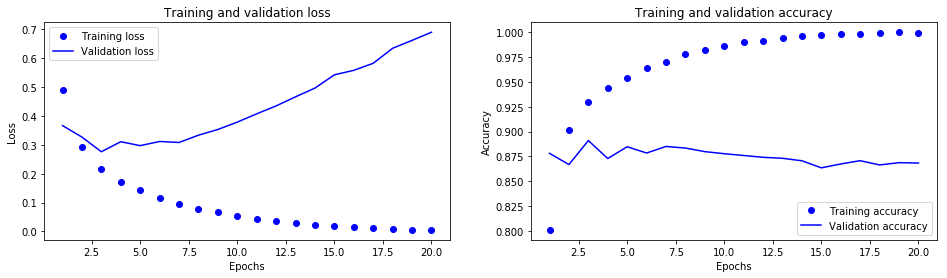

In [114]:
history_data        = history.history

train_accuracy      = history_data['acc']
train_loss          = history_data['loss']
validation_accuracy = history_data['val_acc']
validation_loss     = history_data['val_loss']

epochs              = range(1, len(history_data['acc']) + 1)


f, (left, right) = plt.subplots(1, 2)
f.set_size_inches(16,4)

left.plot(epochs, train_loss, 'bo', label='Training loss')
left.plot(epochs, validation_loss, 'b', label='Validation loss')
left.set_title('Training and validation loss')
left.set_xlabel('Epochs')
left.set_ylabel('Loss')
left.legend()

right.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
right.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
right.set_title('Training and validation accuracy')
right.set_xlabel('Epochs')
right.set_ylabel('Accuracy')
right.legend()

plt.show()


In [115]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/4


  512/25000 [..............................] - ETA: 28s - loss: 0.6928 - acc: 0.5059

 1024/25000 [>.............................] - ETA: 15s - loss: 0.6851 - acc: 0.5195

 2048/25000 [=>............................] - ETA: 8s - loss: 0.6627 - acc: 0.6060 

 2560/25000 [==>...........................] - ETA: 7s - loss: 0.6532 - acc: 0.6258

 3072/25000 [==>...........................] - ETA: 6s - loss: 0.6558 - acc: 0.6113

 3584/25000 [===>..........................] - ETA: 5s - loss: 0.6483 - acc: 0.6267

 4096/25000 [===>..........................] - ETA: 5s - loss: 0.6391 - acc: 0.6438

 5120/25000 [=====>........................] - ETA: 4s - loss: 0.6178 - acc: 0.6807

 6144/25000 [======>.......................] - ETA: 3s - loss: 0.6005 - acc: 0.7052

 7168/25000 [=======>......................] - ETA: 3s - loss: 0.5866 - acc: 0.7192

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.5759 - acc: 0.7289

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.5633 - acc: 0.7418

10240/25000 [===========>..................] - ETA: 2s - loss: 0.5525 - acc: 0.7517

10752/25000 [===========>..................] - ETA: 2s - loss: 0.5473 - acc: 0.7559

11264/25000 [============>.................] - ETA: 2s - loss: 0.5410 - acc: 0.7613

11776/25000 [=============>................] - ETA: 1s - loss: 0.5355 - acc: 0.7655

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5259 - acc: 0.7734

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5163 - acc: 0.7812

14336/25000 [================>.............] - ETA: 1s - loss: 0.5129 - acc: 0.7822

15360/25000 [=================>............] - ETA: 1s - loss: 0.5068 - acc: 0.7852

16384/25000 [==================>...........] - ETA: 1s - loss: 0.4983 - acc: 0.7909

17408/25000 [===================>..........] - ETA: 0s - loss: 0.4909 - acc: 0.7956

18432/25000 [=====================>........] - ETA: 0s - loss: 0.4831 - acc: 0.8000

19456/25000 [======================>.......] - ETA: 0s - loss: 0.4756 - acc: 0.8046

20480/25000 [=======================>......] - ETA: 0s - loss: 0.4690 - acc: 0.8085

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4645 - acc: 0.8105

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4596 - acc: 0.8135

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4549 - acc: 0.8153

24576/25000 [============================>.] - ETA: 0s - loss: 0.4494 - acc: 0.8182

25000/25000 [==============================] - 3s 115us/step - loss: 0.4469 - acc: 0.8196


Epoch 2/4
  512/25000 [..............................] - ETA: 2s - loss: 0.2704 - acc: 0.9180

 1024/25000 [>.............................] - ETA: 2s - loss: 0.2691 - acc: 0.9238

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2764 - acc: 0.9154

 2048/25000 [=>............................] - ETA: 2s - loss: 0.2708 - acc: 0.9165

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2698 - acc: 0.9172

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.2787 - acc: 0.9113

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2819 - acc: 0.9084

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2797 - acc: 0.9103

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2774 - acc: 0.9111

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2757 - acc: 0.9109

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2714 - acc: 0.9131

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2708 - acc: 0.9131

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2688 - acc: 0.9129

11776/25000 [=============>................] - ETA: 1s - loss: 0.2671 - acc: 0.9130

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2645 - acc: 0.9128

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2631 - acc: 0.9126

14848/25000 [================>.............] - ETA: 0s - loss: 0.2634 - acc: 0.9124

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2630 - acc: 0.9123

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2638 - acc: 0.9114

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2635 - acc: 0.9112

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2634 - acc: 0.9109

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2614 - acc: 0.9114

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2608 - acc: 0.9116

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2591 - acc: 0.9117

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2587 - acc: 0.9115

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2580 - acc: 0.9115

25000/25000 [==============================] - 2s 84us/step - loss: 0.2572 - acc: 0.9118


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.2052 - acc: 0.9258

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1961 - acc: 0.9346

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2007 - acc: 0.9316



 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1978 - acc: 0.9332

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.2005 - acc: 0.9316

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2013 - acc: 0.9321

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1980 - acc: 0.9325

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1975 - acc: 0.9313

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1969 - acc: 0.9319

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1966 - acc: 0.9313

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1958 - acc: 0.9312

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1975 - acc: 0.9294

11776/25000 [=============>................] - ETA: 1s - loss: 0.1975 - acc: 0.9288

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1972 - acc: 0.9294

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1993 - acc: 0.9286

14848/25000 [================>.............] - ETA: 0s - loss: 0.1995 - acc: 0.9288

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1997 - acc: 0.9294

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1985 - acc: 0.9300

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1982 - acc: 0.9300

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1971 - acc: 0.9303

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1990 - acc: 0.9292

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2002 - acc: 0.9283

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1995 - acc: 0.9285

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1986 - acc: 0.9287

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1984 - acc: 0.9288

25000/25000 [==============================] - 2s 84us/step - loss: 0.1988 - acc: 0.9282


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1639 - acc: 0.9375

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1764 - acc: 0.9297

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1785 - acc: 0.9271

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1661 - acc: 0.9352

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1613 - acc: 0.9400

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1649 - acc: 0.9412

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1625 - acc: 0.9441

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1593 - acc: 0.9459

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1589 - acc: 0.9461

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1588 - acc: 0.9463

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1590 - acc: 0.9462

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1590 - acc: 0.9459

11776/25000 [=============>................] - ETA: 1s - loss: 0.1596 - acc: 0.9451

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1624 - acc: 0.9435

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1634 - acc: 0.9428

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1633 - acc: 0.9431

14336/25000 [================>.............] - ETA: 0s - loss: 0.1639 - acc: 0.9422

14848/25000 [================>.............] - ETA: 0s - loss: 0.1662 - acc: 0.9410

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1665 - acc: 0.9416

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1670 - acc: 0.9414

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1683 - acc: 0.9411

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1675 - acc: 0.9412

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1682 - acc: 0.9410

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1681 - acc: 0.9409

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1684 - acc: 0.9407

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1677 - acc: 0.9411

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1679 - acc: 0.9413

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1680 - acc: 0.9411

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1679 - acc: 0.9411

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1675 - acc: 0.9411

25000/25000 [==============================] - 2s 91us/step - loss: 0.1677 - acc: 0.9408


   32/25000 [..............................] - ETA: 2:44

  672/25000 [..............................] - ETA: 9s  

 1344/25000 [>.............................] - ETA: 5s

 1984/25000 [=>............................] - ETA: 4s

 2656/25000 [==>...........................] - ETA: 3s

 3264/25000 [==>...........................] - ETA: 3s

 3872/25000 [===>..........................] - ETA: 2s

 4480/25000 [====>.........................] - ETA: 2s

 5120/25000 [=====>........................] - ETA: 2s

 5792/25000 [=====>........................] - ETA: 2s

 6432/25000 [======>.......................] - ETA: 2s

 7072/25000 [=======>......................] - ETA: 1s

 7680/25000 [========>.....................] - ETA: 1s

 8288/25000 [========>.....................] - ETA: 1s

 8896/25000 [=========>....................] - ETA: 1s

 9536/25000 [==========>...................] - ETA: 1s

10208/25000 [===========>..................] - ETA: 1s

10848/25000 [============>.................] - ETA: 1s

11520/25000 [============>.................] - ETA: 1s

12160/25000 [=============>................] - ETA: 1s

12768/25000 [==============>...............] - ETA: 1s

13440/25000 [===============>..............] - ETA: 1s



14112/25000 [===============>..............] - ETA: 1s

14720/25000 [================>.............] - ETA: 0s

15424/25000 [=================>............] - ETA: 0s

16128/25000 [==================>...........] - ETA: 0s

16832/25000 [===================>..........] - ETA: 0s

17536/25000 [====================>.........] - ETA: 0s

18240/25000 [====================>.........] - ETA: 0s

18944/25000 [=====================>........] - ETA: 0s

19648/25000 [======================>.......] - ETA: 0s

20352/25000 [=======================>......] - ETA: 0s

21024/25000 [========================>.....] - ETA: 0s

21696/25000 [=========================>....] - ETA: 0s

22368/25000 [=========================>....] - ETA: 0s

23040/25000 [==========================>...] - ETA: 0s

23712/25000 [===========================>..] - ETA: 0s

24384/25000 [============================>.] - ETA: 0s



25000/25000 [==============================] - 2s 86us/step


[1.9436773615646363, 0.50075999999999998]


In [117]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/4


  512/25000 [..............................] - ETA: 25s - loss: 0.6937 - acc: 0.5117

 1024/25000 [>.............................] - ETA: 14s - loss: 0.6834 - acc: 0.5713

 1536/25000 [>.............................] - ETA: 10s - loss: 0.6686 - acc: 0.5990

 2048/25000 [=>............................] - ETA: 8s - loss: 0.6839 - acc: 0.5718 

 2560/25000 [==>...........................] - ETA: 6s - loss: 0.6771 - acc: 0.5734

 3072/25000 [==>...........................] - ETA: 6s - loss: 0.6709 - acc: 0.5771

 3584/25000 [===>..........................] - ETA: 5s - loss: 0.6593 - acc: 0.6016

 4096/25000 [===>..........................] - ETA: 4s - loss: 0.6449 - acc: 0.6248

 4608/25000 [====>.........................] - ETA: 4s - loss: 0.6358 - acc: 0.6341

 5120/25000 [=====>........................] - ETA: 4s - loss: 0.6275 - acc: 0.6387

 5632/25000 [=====>........................] - ETA: 3s - loss: 0.6126 - acc: 0.6578

 6144/25000 [======>.......................] - ETA: 3s - loss: 0.5992 - acc: 0.6727

 6656/25000 [======>.......................] - ETA: 3s - loss: 0.5890 - acc: 0.6834

 7168/25000 [=======>......................] - ETA: 3s - loss: 0.5871 - acc: 0.6837

 7680/25000 [========>.....................] - ETA: 3s - loss: 0.5808 - acc: 0.6891

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.5747 - acc: 0.6940

 8704/25000 [=========>....................] - ETA: 2s - loss: 0.5661 - acc: 0.7014

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.5577 - acc: 0.7092



 9728/25000 [==========>...................] - ETA: 2s - loss: 0.5499 - acc: 0.7162

10240/25000 [===========>..................] - ETA: 2s - loss: 0.5426 - acc: 0.7223

10752/25000 [===========>..................] - ETA: 2s - loss: 0.5373 - acc: 0.7267

11264/25000 [============>.................] - ETA: 2s - loss: 0.5330 - acc: 0.7303

11776/25000 [=============>................] - ETA: 2s - loss: 0.5267 - acc: 0.7347

12288/25000 [=============>................] - ETA: 2s - loss: 0.5208 - acc: 0.7395

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5140 - acc: 0.7443

13312/25000 [==============>...............] - ETA: 1s - loss: 0.5083 - acc: 0.7481

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5010 - acc: 0.7534

14336/25000 [================>.............] - ETA: 1s - loss: 0.4953 - acc: 0.7580

14848/25000 [================>.............] - ETA: 1s - loss: 0.4903 - acc: 0.7617

15360/25000 [=================>............] - ETA: 1s - loss: 0.4862 - acc: 0.7639

15872/25000 [==================>...........] - ETA: 1s - loss: 0.4852 - acc: 0.7656

16384/25000 [==================>...........] - ETA: 1s - loss: 0.4850 - acc: 0.7657

16896/25000 [===================>..........] - ETA: 1s - loss: 0.4816 - acc: 0.7683

17408/25000 [===================>..........] - ETA: 1s - loss: 0.4780 - acc: 0.7713



17920/25000 [====================>.........] - ETA: 1s - loss: 0.4742 - acc: 0.7734

18432/25000 [=====================>........] - ETA: 1s - loss: 0.4708 - acc: 0.7756

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4674 - acc: 0.7776



19456/25000 [======================>.......] - ETA: 0s - loss: 0.4647 - acc: 0.7799

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4603 - acc: 0.7825

20480/25000 [=======================>......] - ETA: 0s - loss: 0.4556 - acc: 0.7855

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4514 - acc: 0.7884

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4469 - acc: 0.7911

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4432 - acc: 0.7931

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4421 - acc: 0.7939

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4418 - acc: 0.7944

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4402 - acc: 0.7953

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4366 - acc: 0.7972

24576/25000 [============================>.] - ETA: 0s - loss: 0.4326 - acc: 0.7998

25000/25000 [==============================] - 4s 148us/step - loss: 0.4299 - acc: 0.8014


Epoch 2/4


  512/25000 [..............................] - ETA: 4s - loss: 0.2352 - acc: 0.9141

 1024/25000 [>.............................] - ETA: 4s - loss: 0.2352 - acc: 0.9111

 1536/25000 [>.............................] - ETA: 4s - loss: 0.2385 - acc: 0.9049

 2048/25000 [=>............................] - ETA: 4s - loss: 0.2315 - acc: 0.9097

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.2308 - acc: 0.9141

 3072/25000 [==>...........................] - ETA: 3s - loss: 0.2254 - acc: 0.9163

 3584/25000 [===>..........................] - ETA: 3s - loss: 0.2165 - acc: 0.9213

 4096/25000 [===>..........................] - ETA: 3s - loss: 0.2182 - acc: 0.9199

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.2183 - acc: 0.9193

 5120/25000 [=====>........................] - ETA: 3s - loss: 0.2266 - acc: 0.9150

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.2403 - acc: 0.9075

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.2529 - acc: 0.9041



 6656/25000 [======>.......................] - ETA: 2s - loss: 0.2559 - acc: 0.9026

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.2540 - acc: 0.9029

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.2513 - acc: 0.9038

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.2494 - acc: 0.9044

 8704/25000 [=========>....................] - ETA: 2s - loss: 0.2460 - acc: 0.9060

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.2450 - acc: 0.9060

 9728/25000 [==========>...................] - ETA: 2s - loss: 0.2445 - acc: 0.9062

10240/25000 [===========>..................] - ETA: 2s - loss: 0.2436 - acc: 0.9076

10752/25000 [===========>..................] - ETA: 2s - loss: 0.2441 - acc: 0.9073

11264/25000 [============>.................] - ETA: 1s - loss: 0.2431 - acc: 0.9070

11776/25000 [=============>................] - ETA: 1s - loss: 0.2405 - acc: 0.9078

12288/25000 [=============>................] - ETA: 1s - loss: 0.2394 - acc: 0.9081

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2380 - acc: 0.9091

13312/25000 [==============>...............] - ETA: 1s - loss: 0.2375 - acc: 0.9093

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2390 - acc: 0.9088

14336/25000 [================>.............] - ETA: 1s - loss: 0.2412 - acc: 0.9084

14848/25000 [================>.............] - ETA: 1s - loss: 0.2418 - acc: 0.9082

15360/25000 [=================>............] - ETA: 1s - loss: 0.2407 - acc: 0.9087

15872/25000 [==================>...........] - ETA: 1s - loss: 0.2397 - acc: 0.9095

16384/25000 [==================>...........] - ETA: 1s - loss: 0.2390 - acc: 0.9098

16896/25000 [===================>..........] - ETA: 1s - loss: 0.2384 - acc: 0.9100

17408/25000 [===================>..........] - ETA: 1s - loss: 0.2370 - acc: 0.9105

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2376 - acc: 0.9097

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2377 - acc: 0.9090

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2373 - acc: 0.9087

19456/25000 [======================>.......] - ETA: 0s - loss: 0.2361 - acc: 0.9091

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2362 - acc: 0.9088

20480/25000 [=======================>......] - ETA: 0s - loss: 0.2357 - acc: 0.9088

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2354 - acc: 0.9091

21504/25000 [========================>.....] - ETA: 0s - loss: 0.2353 - acc: 0.9092

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2359 - acc: 0.9086

22528/25000 [==========================>...] - ETA: 0s - loss: 0.2355 - acc: 0.9087

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2343 - acc: 0.9090

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2339 - acc: 0.9092

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2328 - acc: 0.9099

24576/25000 [============================>.] - ETA: 0s - loss: 0.2329 - acc: 0.9096

25000/25000 [==============================] - 3s 127us/step - loss: 0.2336 - acc: 0.9096


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.2160 - acc: 0.9004

 1024/25000 [>.............................] - ETA: 3s - loss: 0.2050 - acc: 0.9111

 1536/25000 [>.............................] - ETA: 3s - loss: 0.1990 - acc: 0.9180

 2048/25000 [=>............................] - ETA: 3s - loss: 0.1860 - acc: 0.9233

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1828 - acc: 0.9285

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.1811 - acc: 0.9297

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1812 - acc: 0.9311

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1761 - acc: 0.9329

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1742 - acc: 0.9347

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1712 - acc: 0.9363

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.1688 - acc: 0.9380

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.1723 - acc: 0.9351

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.1868 - acc: 0.9277

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.1953 - acc: 0.9229

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.1980 - acc: 0.9211

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.1953 - acc: 0.9227

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1917 - acc: 0.9241

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.1909 - acc: 0.9250

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1881 - acc: 0.9262

10240/25000 [===========>..................] - ETA: 1s - loss: 0.1870 - acc: 0.9269

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1844 - acc: 0.9278

11264/25000 [============>.................] - ETA: 1s - loss: 0.1818 - acc: 0.9291

11776/25000 [=============>................] - ETA: 1s - loss: 0.1810 - acc: 0.9299

12288/25000 [=============>................] - ETA: 1s - loss: 0.1797 - acc: 0.9311

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1802 - acc: 0.9311

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1783 - acc: 0.9318

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1769 - acc: 0.9324

14336/25000 [================>.............] - ETA: 1s - loss: 0.1773 - acc: 0.9322

14848/25000 [================>.............] - ETA: 1s - loss: 0.1773 - acc: 0.9322

15360/25000 [=================>............] - ETA: 1s - loss: 0.1778 - acc: 0.9319

15872/25000 [==================>...........] - ETA: 1s - loss: 0.1781 - acc: 0.9320

16384/25000 [==================>...........] - ETA: 1s - loss: 0.1799 - acc: 0.9316

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1816 - acc: 0.9307

17408/25000 [===================>..........] - ETA: 0s - loss: 0.1835 - acc: 0.9299

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1844 - acc: 0.9297

18432/25000 [=====================>........] - ETA: 0s - loss: 0.1840 - acc: 0.9298

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1825 - acc: 0.9307

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1816 - acc: 0.9309

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1809 - acc: 0.9311

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1804 - acc: 0.9312

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1794 - acc: 0.9315

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1790 - acc: 0.9318

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1781 - acc: 0.9322

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1786 - acc: 0.9320

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1793 - acc: 0.9317

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1804 - acc: 0.9310

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1816 - acc: 0.9306

24576/25000 [============================>.] - ETA: 0s - loss: 0.1818 - acc: 0.9301

25000/25000 [==============================] - 3s 115us/step - loss: 0.1820 - acc: 0.9300


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1343 - acc: 0.9551

 1024/25000 [>.............................] - ETA: 3s - loss: 0.1368 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 3s - loss: 0.1316 - acc: 0.9590

 2048/25000 [=>............................] - ETA: 3s - loss: 0.1247 - acc: 0.9619

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1193 - acc: 0.9633

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.1193 - acc: 0.9622

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1169 - acc: 0.9634

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1163 - acc: 0.9626

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1143 - acc: 0.9625

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1144 - acc: 0.9631

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.1135 - acc: 0.9624

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.1167 - acc: 0.9613

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.1204 - acc: 0.9594

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.1290 - acc: 0.9551

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.1347 - acc: 0.9526

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.1384 - acc: 0.9508

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1385 - acc: 0.9513

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.1367 - acc: 0.9520

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1362 - acc: 0.9518

10240/25000 [===========>..................] - ETA: 1s - loss: 0.1355 - acc: 0.9521

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1347 - acc: 0.9522

11264/25000 [============>.................] - ETA: 1s - loss: 0.1335 - acc: 0.9525

11776/25000 [=============>................] - ETA: 1s - loss: 0.1326 - acc: 0.9530

12288/25000 [=============>................] - ETA: 1s - loss: 0.1325 - acc: 0.9530

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1313 - acc: 0.9534

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1311 - acc: 0.9531

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1304 - acc: 0.9536

14336/25000 [================>.............] - ETA: 1s - loss: 0.1302 - acc: 0.9531

14848/25000 [================>.............] - ETA: 1s - loss: 0.1307 - acc: 0.9528

15360/25000 [=================>............] - ETA: 1s - loss: 0.1301 - acc: 0.9529

15872/25000 [==================>...........] - ETA: 1s - loss: 0.1297 - acc: 0.9530

16384/25000 [==================>...........] - ETA: 0s - loss: 0.1313 - acc: 0.9522

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1350 - acc: 0.9503



17408/25000 [===================>..........] - ETA: 0s - loss: 0.1403 - acc: 0.9482

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1407 - acc: 0.9478



18432/25000 [=====================>........] - ETA: 0s - loss: 0.1401 - acc: 0.9480

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1395 - acc: 0.9482

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1392 - acc: 0.9482

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1383 - acc: 0.9485

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1383 - acc: 0.9482

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1374 - acc: 0.9485

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1370 - acc: 0.9486

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1362 - acc: 0.9490

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1364 - acc: 0.9490

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1359 - acc: 0.9490

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1353 - acc: 0.9491

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1350 - acc: 0.9494

24576/25000 [============================>.] - ETA: 0s - loss: 0.1350 - acc: 0.9494

25000/25000 [==============================] - 3s 117us/step - loss: 0.1364 - acc: 0.9488


   32/25000 [..............................] - ETA: 2:31

  480/25000 [..............................] - ETA: 12s 

  928/25000 [>.............................] - ETA: 7s 

 1376/25000 [>.............................] - ETA: 6s

 1856/25000 [=>............................] - ETA: 5s

 2304/25000 [=>............................] - ETA: 4s

 2752/25000 [==>...........................] - ETA: 4s

 3200/25000 [==>...........................] - ETA: 3s

 3648/25000 [===>..........................] - ETA: 3s

 4096/25000 [===>..........................] - ETA: 3s

 4544/25000 [====>.........................] - ETA: 3s

 4992/25000 [====>.........................] - ETA: 3s

 5408/25000 [=====>........................] - ETA: 2s

 5856/25000 [======>.......................] - ETA: 2s

 6304/25000 [======>.......................] - ETA: 2s

 6752/25000 [=======>......................] - ETA: 2s

 7200/25000 [=======>......................] - ETA: 2s

 7616/25000 [========>.....................] - ETA: 2s

 8000/25000 [========>.....................] - ETA: 2s

 8416/25000 [=========>....................] - ETA: 2s

 8864/25000 [=========>....................] - ETA: 2s

 9344/25000 [==========>...................] - ETA: 2s

 9824/25000 [==========>...................] - ETA: 2s

10272/25000 [===========>..................] - ETA: 1s

10752/25000 [===========>..................] - ETA: 1s

11232/25000 [============>.................] - ETA: 1s

11712/25000 [=============>................] - ETA: 1s

12192/25000 [=============>................] - ETA: 1s

12640/25000 [==============>...............] - ETA: 1s

13120/25000 [==============>...............] - ETA: 1s

13600/25000 [===============>..............] - ETA: 1s

14080/25000 [===============>..............] - ETA: 1s

14560/25000 [================>.............] - ETA: 1s

15040/25000 [=================>............] - ETA: 1s

15520/25000 [=================>............] - ETA: 1s

16000/25000 [==================>...........] - ETA: 1s

16480/25000 [==================>...........] - ETA: 1s

16960/25000 [===================>..........] - ETA: 1s

17408/25000 [===================>..........] - ETA: 0s

17856/25000 [====================>.........] - ETA: 0s

18304/25000 [====================>.........] - ETA: 0s

18752/25000 [=====================>........] - ETA: 0s

19040/25000 [=====================>........] - ETA: 0s

19520/25000 [======================>.......] - ETA: 0s

19968/25000 [======================>.......] - ETA: 0s

20320/25000 [=======================>......] - ETA: 0s

20768/25000 [=======================>......] - ETA: 0s

21088/25000 [========================>.....] - ETA: 0s

21536/25000 [========================>.....] - ETA: 0s

21984/25000 [=========================>....] - ETA: 0s

22432/25000 [=========================>....] - ETA: 0s

22912/25000 [==========================>...] - ETA: 0s

23392/25000 [===========================>..] - ETA: 0s

23872/25000 [===========================>..] - ETA: 0s

24352/25000 [============================>.] - ETA: 0s

24832/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 3s 123us/step


[2.4796402395629884, 0.49471999999999999]
